# Week 3: Day 3 AM // Practical Statistics: Descriptive

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Relationship between Variables

## Covariance & Correlation

Covariance is a measure of the joint variability of two random variables

Correlation is a statistic that measures the degree to which two variables move in relation to each other

In [32]:
x = np.arange(0,10,0.1)
y1 = x*0.5 + np.random.normal(scale=0.5,size=len(x))
y2 = -x*0.5 + np.random.normal(scale=0.5,size=len(x))
y3 = x*1e-3 + np.random.normal(scale=0.5,size=len(x))

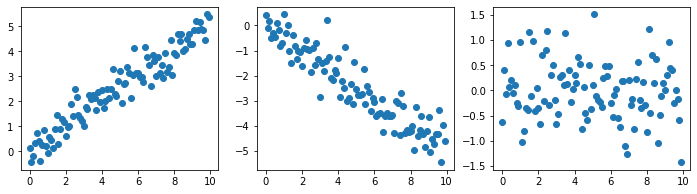

In [33]:
fig,ax = plt.subplots(1,3,figsize=(12,3))
ax[0].scatter(x,y1)
ax[1].scatter(x,y2)
ax[2].scatter(x,y3)

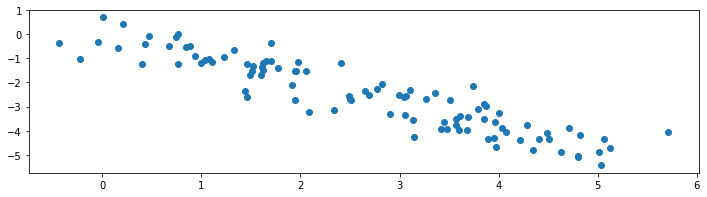

In [23]:
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.scatter(y1,y2)

In [29]:
X = np.stack((x, y1,y2,y3), axis=0)
np.cov(X)

array([[ 8.33341667e+06,  4.16671214e+06, -4.16671006e+06,
         8.34061942e+03],
       [ 4.16671214e+06,  2.08335823e+06, -2.08335694e+06,
         4.17031347e+03],
       [-4.16671006e+06, -2.08335694e+06,  2.08335614e+06,
        -4.17031125e+03],
       [ 8.34061942e+03,  4.17031347e+03, -4.17031125e+03,
         8.59921057e+00]])

In [28]:
# Pearson Correlation
np.corrcoef(x,y1)

array([[1.        , 0.99999994],
       [0.99999994, 1.        ]])

Correlation can be seen as scaled version of Covariance

## Causality

Causality (also referred to as causation, or cause and effect) is influence by which one event, process, state or object (a cause) contributes to the production of another event, process, state or object (an effect) where the cause is partly responsible for the effect, and the effect is partly dependent on the cause.

### Causality Test

In [6]:
import statsmodels

In [7]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df['month'] = df.date.dt.month
grangercausalitytests(df[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.779674835573566, 3.6614258713531555e-12, 200.0, 1),
   'ssr_chi2test': (55.60136995810717, 8.876175235021637e-14, 1),
   'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557362, 3.6614258713530505e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.6989179987325, 1.913323508685587e-42, 197.0, 2),
   'ssr_chi2test': (333.65666432227374, 3.5267600881275606e-73, 2),
   'lrtest': (196.99559277182198, 1.6709003499115789e-43, 2),
   'params_ftest': (162.69891799873255, 1.9133235086855594e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

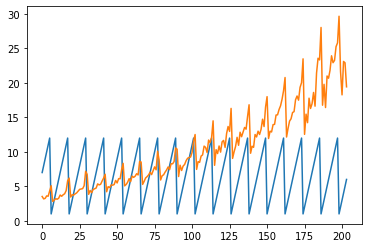

In [8]:
plt.plot(np.arange(len(df)),df['month'])
plt.plot(np.arange(len(df)),df['value'])

The hypothesis is accepted (P=0), thus variable month have casuality to value

In [9]:
grangercausalitytests(X.T, maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=-72.9395, p=1.0000  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=-75.2189, p=1.0000  , df=1
likelihood ratio test: chi2=-141.1965, p=1.0000  , df=1
parameter F test:         F=0.0578  , p=0.8105  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=-45.0736, p=1.0000  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=-93.9833, p=1.0000  , df=2
likelihood ratio test: chi2=-313.0624, p=1.0000  , df=2
parameter F test:         F=0.0590  , p=0.9428  , df_denom=94, df_num=2


{1: ({'ssr_ftest': (-72.93949667044734, 1.0, 96.0, 1),
   'ssr_chi2test': (-75.21885594139883, 1.0, 1),
   'lrtest': (-141.1964581412294, 1.0, 1),
   'params_ftest': (0.05778668611317322, 0.8105415993738592, 96.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (-45.073637991406756, 1.0, 94.0, 2),
   'ssr_chi2test': (-93.98333027995452, 1.0, 2),
   'lrtest': (-313.06240602805156, 1.0, 2),
   'params_ftest': (0.0589904072342868, 0.9427506830568192, 94.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

We can see the Hypothesis is rejected, and shows high correlation does not mean high causality.

## Nonparametric Data Summarization

## Generate Non-Gaussian Data

Let's generate Weibull distributed data. This kind of distribution is quite commonly found in real world. 

In [10]:
import numpy as np

In [11]:
dist_data=np.random.weibull(a=1,size=1000)

C:\Users\madin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

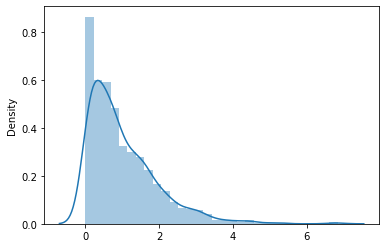

In [12]:
import seaborn as sns
sns.distplot(dist_data)

Here we can instinctively deduct that mean is no longer a correct representative of the data centerness, and we can no longer determine the data distribution with only mean and standar deviation. Thus, we need to find another way to determine how the data distributde.

Data summarization techniques provide a way to describe the distribution of data using a few key measurements.

The most common example of data summarization is the calculation of the mean and standard deviation for data that has a Gaussian distribution. With these two parameters alone, you can understand and re-create the distribution of the data. The data summary can compress as few as tens or as many as millions individual observations.

The problem is, you cannot easily calculate the mean and standard deviation of data that does not have a Gaussian distribution. Technically, you can calculate these quantities, but they do not summarize the data distribution; in fact, they can be very misleading.

In the case of data that does not have a Gaussian distribution, you can summarize the data sample using the five-number summary.

### Five-Number Summary

The five-number summary, or 5-number summary for short, is a non-parametric data summarization technique.

It is sometimes called the Tukey 5-number summary because it was recommended by John Tukey. It can be used to describe the distribution of data samples for data with any distribution.

As a standard summary for general use, the 5-number summary provides about the right amount of detail.

The five-number summary involves the calculation of 5 summary statistical quantities: namely:

- Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
- 1st Quartile: The 25th percentile.
- 3rd Quartile: The 75th percentile.
- Minimum: The smallest observation in the sample.
- Maximum: The largest observation in the sample.

A quartile is an observed value at a point that aids in splitting the ordered data sample into four equally sized parts. The median, or 2nd Quartile, splits the ordered data sample into two parts, and the 1st and 3rd quartiles split each of those halves into quarters.

A percentile is an observed value at a point that aids in splitting the ordered data sample into 100 equally sized portions. Quartiles are often also expressed as percentiles.

Both the quartile and percentile values are examples of rank statistics that can be calculated on a data sample with any distribution. They are used to quickly summarize how much of the data in the distribution is behind or in front of a given observed value. For example, half of the observations are behind and in front of the median of a distribution.

Note that quartiles are also calculated in the box and whisker plot, a nonparametric method to graphically summarize the distribution of a data sample.


### How to Calculate the Five-Number Summary

Calculating the five-number summary involves finding the observations for each quartile as well as the minimum and maximum observed values from the data sample.

If there is no specific value in the ordered data sample for the quartile, such as if there are an even number of observations and we are trying to find the median, then we can calculate the mean of the two closest values, such as the two middle values.

We can calculate arbitrary percentile values in Python using the percentile() NumPy function. We can use this function to calculate the 1st, 2nd (median), and 3rd quartile values. The function takes both an array of observations and a floating point value to specify the percentile to calculate in the range of 0 to 100. It can also takes a list of percentile values to calculate multiple percentiles; for example:

In [38]:
percentiles = np.percentile(dist_data, [1,25, 50, 75,99])
print(percentiles)

[0.00660717 0.30476914 0.74427426 1.46692113 4.31161892]


By default, the function will calculate a linear interpolation (average) between observations if needed, such as in the case of calculating the median on a sample with an even number of values.

The NumPy functions min() and max() can be used to return the smallest and largest values in the data sample; for example:

In [14]:
data_min, data_max = dist_data.min(), dist_data.max()
print(data_min)
print(data_max)

0.0008465309261169343
6.845846952359618


We can put all of this together.

The example below generates a data sample drawn from a uniform distribution between 0 and 1 and summarizes it using the five-number summary.

In [39]:
# calculate a 5-number summary
from numpy import percentile
from numpy.random import rand
# generate data sample
data = rand(1000)
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.001
Q1: 0.267
Median: 0.527
Q3: 0.743
Max: 1.000


Running the example generates the data sample and calculates the five-number summary to describe the sample distribution.

We can see that the spread of observations is close to our expectations showing 0.27 for the 25th percentile 0.53 for the 50th percentile, and 0.76 for the 75th percentile, close to the idealized values of 0.25, 0.50, and 0.75 respectively.

## Tukey's rule for Outlier Detection

Another famous idea by Tukey is how to use his 5-number summary for detecting outlier. The gist is that data that deviates from their quartiles above certain threshold will be flagged as outlier.

The formula for Tukey outlier detection

$${q_{3}+1.5*IQR}$$

$${q_{1}-1.5*IQR}$$

$$ IQR = Q3-Q1 $$

## Plotting with Python

5-number summary can be visualize easily with charts.

In [16]:
import seaborn as sns

In [17]:
sns.boxplot

<function seaborn.categorical.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

C:\Users\madin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

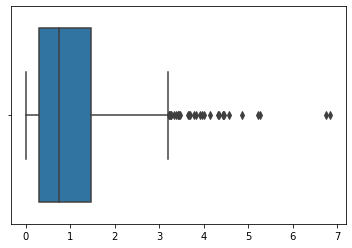

In [40]:
sns.boxplot(dist_data)

<AxesSubplot:ylabel='Density'>

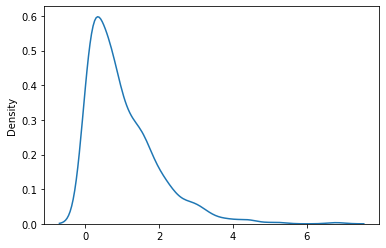

In [41]:
sns.kdeplot(dist_data)